In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import DataFunctions_greg as fc


pd.set_option('display.max_columns', None)

In [2]:
# sns.scatterplot(data=df_testeroo,x="Elevation",y="Horizontal_Distance_To_Fire_Points",hue="Cover_Type",palette='Spectral')
# sns.scatterplot(data=df,y="Elevation",x="Horizontal_Distance_To_Fire_Points")
# sns.scatterplot(data=df,y="Vertical_Distance_To_Hydrology",x="Horizontal_Distance_To_Hydrology")

In [3]:
df = pd.read_csv("covtype.csv")
# df.info()
# s = df['Cover_Type']
# s.replace([1, 3, 4,5,6,7], 0, inplace=True)
# s.replace(2, 1, inplace=True)
df.head()


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [4]:
# df = fc.dummies_back_to_categorical(df,range(-41,-1),"Soil_Type")
# df = fc.dummies_back_to_categorical(df,range(10,14),"Wilderness_Area")
# df.head()

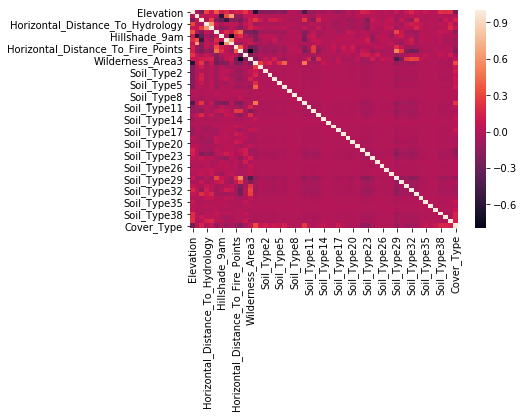

In [5]:
sns.heatmap(df.corr())

In [7]:
X = df.drop(columns=['Cover_Type'])
y = df['Cover_Type']

X_scaled = MinMaxScaler().fit_transform(X)


# Run PCA 

In [8]:
pca=PCA()
pca_all = pca.fit_transform(X_scaled)
st.mean(sum(pca_all))

3.423260483663709e-11

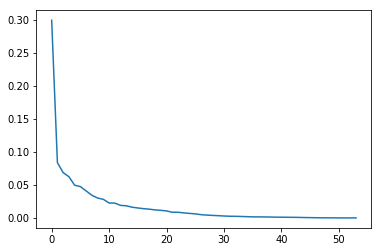

In [9]:
pca.explained_variance_ratio_
sns.lineplot(data=pca.explained_variance_ratio_)

In [10]:
for i in range(0,10):
    print(i, round(pca.explained_variance_ratio_[:i].sum(),3))
    if i>1:
        print("Change in pca:", round(pca.explained_variance_ratio_[:i].sum() - pca.explained_variance_ratio_[:(i-1)].sum(),3),"\n")
    
print(f"The first 4 eigenvectors explain {pca.explained_variance_ratio_[:2].sum()*100}% of the data.")

0 0.0
1 0.3
2 0.384
Change in pca: 0.084 

3 0.452
Change in pca: 0.069 

4 0.515
Change in pca: 0.063 

5 0.565
Change in pca: 0.05 

6 0.612
Change in pca: 0.048 

7 0.653
Change in pca: 0.041 

8 0.687
Change in pca: 0.034 

9 0.718
Change in pca: 0.03 

The first 4 eigenvectors explain 38.36994150721845% of the data.


In [11]:
# from sklearn.decomposition import PCA
# pca = PCA()
# pca_train = pca.fit_transform(X_train)
# st.mean(sum(pca_train))

# pca = PCA()
# pca_test = pca.fit_transform(X_test)
# st.mean(sum(pca_test))

In [12]:
display(pca_all)

array([[ 9.77799879e-01, -3.42011859e-01,  2.64522509e-01, ...,
        -3.78323662e-05, -4.10513712e-14, -3.09548629e-15],
       [ 9.74991769e-01, -3.33597898e-01,  2.70617555e-01, ...,
        -3.48889419e-05, -3.41437477e-14,  4.42802446e-15],
       [ 7.19277143e-01,  1.46455887e-01, -4.36510269e-01, ...,
         7.50500950e-06,  5.79176021e-14, -5.56163473e-16],
       ...,
       [-7.48079203e-01, -9.60965281e-03,  6.74187462e-02, ...,
         2.39174405e-05, -1.48645129e-17,  1.97103575e-17],
       [-7.50846356e-01, -4.88110600e-03,  8.16078150e-02, ...,
         2.35209401e-05, -9.30038867e-18, -4.39101466e-17],
       [-7.48955903e-01, -7.75838081e-03,  7.30799792e-02, ...,
         2.50244895e-05,  2.07536772e-17,  1.12925343e-17]])

In [13]:
pca_df = pd.DataFrame(pca_all[:, :4], index=df.index)
pca_df.head()

,0,1,2,3
0,0.977800,-0.342012,0.264523,0.282168
1,0.974992,-0.333598,0.270618,0.268270
2,0.719277,0.146456,-0.436510,0.042995
3,0.711337,0.169038,-0.392367,0.021966
4,0.977134,-0.334080,0.260437,0.294788


In [14]:
pca_df.rename(columns={0:'c1',1:'c2',2:'c3',3:'c4',4:'c5'}, inplace=True)

In [15]:
df_new = df.join(pca_df)
df_new.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,c1,c2,c3,c4
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,0.977800,-0.342012,0.264523,0.282168
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,0.974992,-0.333598,0.270618,0.268270
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0.719277,0.146456,-0.436510,0.042995
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0.711337,0.169038,-0.392367,0.021966
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,0.977134,-0.334080,0.260437,0.294788


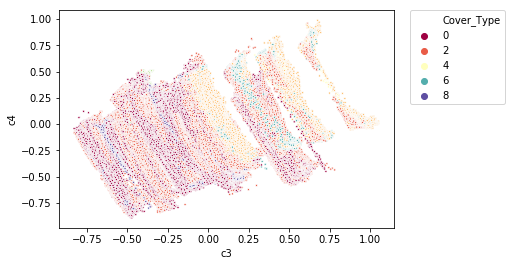

In [16]:
sns.scatterplot(data=df_new, x='c3',y='c4',hue="Cover_Type",palette='Spectral',s=5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

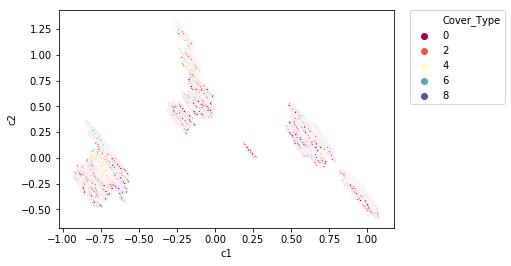

In [18]:
sns.scatterplot(data=df_new, x='c1',y='c2',hue="Cover_Type",palette='Spectral',s=5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [17]:
vects = pca.components_[:4]

In [ ]:
one = pd.Series(vects[0], index=df.drop(columns=['Cover_Type',"Wilderness_Area","Soil_Type"]).columns)
one.sort_values(ascending=False)

In [ ]:
two = pd.Series(vects[1], index=df.drop(columns=['Cover_Type',"Wilderness_Area","Soil_Type"]).columns)
two.sort_values(ascending=False)

In [ ]:
three = pd.Series(vects[2], index=df.drop(columns=['Cover_Type',"Wilderness_Area","Soil_Type"]).columns)
three.sort_values(ascending=False)

In [ ]:
four = pd.Series(vects[3], index=df.drop(columns=['Cover_Type',"Wilderness_Area","Soil_Type"]).columns)
four.sort_values(ascending=False)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train_scaled = MinMaxScaler().fit_transform(X_train)
X_test_scaled = MinMaxScaler().fit_transform(X_test)